## Say hello to `torch_dreams`

**What is it ?**
Torch-dreams is a python library that can be used as a tool to understand how neural networks build up their understanding of images. This is done through feature visualization. 

<img src = "https://github.com/Mayukhdeb/torch-dreams/raw/master/images/inceptionv3_cherrypicked_channels.jpg?raw=true">

If you want to know more about feature visualization, have a look at the following links:
* [Feature visualization by Olah, et al.](https://distill.pub/2017/feature-visualization/)
* [The enemy of feature visualization by Olah, et al.](https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis)

## Getting started with visualizing the `inceptionV3`

`torch_dreams.dreamer` is a wrapper on top of a pytorch model which would run optimizations on the input image to maximize the activations of layer(s), channel(s), or even single unit(s) within the model.  

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import torchvision.models as models 

from torch_dreams.dreamer import dreamer

In [2]:
model = models.inception_v3(pretrained=True)
dreamy_boi = dreamer(model)

dreamer init on:  cuda


In [ ]:
!wget https://raw.githubusercontent.com/Mayukhdeb/torch-dreams/master/images/noise.jpg

## First off, let's optimize some random noise to maximize layer activations within the `inceptionV3`

**Step 1**: Select the layer to be optimized 

**Step 2**: Run `dreamer.deep_dream()` with your hyperparameters.

To try it out on different layers, set: `layer = model.your_layer_name`


In [16]:
layer = model.Mixed_5d
layers_to_use = [layer]

In [17]:

out_single_layer = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.3,
    num_octaves = 7,
    iterations = 100,
    lr = 0.9
)

100%|██████████| 8/8 [00:17<00:00,  2.21s/it]


Text(0.5, 1.0, 'inceptionv3.Mixed_5d')

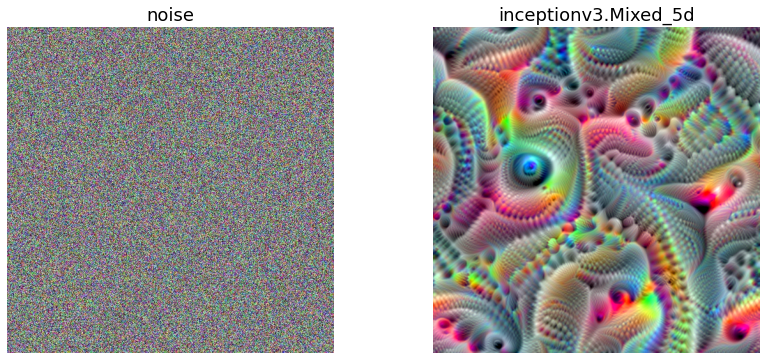

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax.flat[0].imshow(cv2.imread("noise.jpg"))
ax.flat[0].set_title("noise", fontsize = 18)
ax.flat[0].axis("off")

ax.flat[1].imshow(out_single_layer)
ax.flat[1].axis("off")
ax.flat[1].set_title("inceptionv3.Mixed_5d", fontsize = 18)


## Visualizing 2 conv layers individually first, and then simultaneously

In [4]:
layers_to_use = [
    model.Mixed_6c.branch7x7_1.conv,
    model.Mixed_6a.branch3x3dbl_1.conv ## feel free to change these layers
]

Text(0.5, 1.0, 'model.Mixed_6a.branch3x3dbl_1.conv')

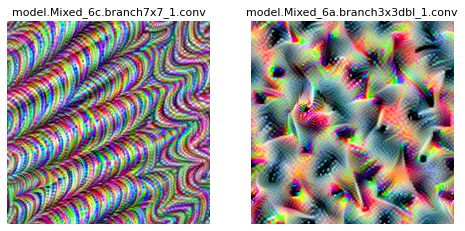

In [66]:
out_layer_1 = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use[:1],  ## using only  model.Mixed_6c.branch7x7_1.conv
    octave_scale = 1.1,
    num_octaves = 11,
    iterations = 100,
    lr = 4.9,
    custom_func = None
)

out_layer_2 = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use[-1:],  ## using only model.Mixed_6a.branch3x3dbl_1.conv
    octave_scale = 1.1,
    num_octaves = 11,
    iterations = 100,
    lr = 4.9,
    custom_func = None
)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))
ax.flat[0].imshow(out_layer_1)
ax.flat[0].set_title("model.Mixed_6c.branch7x7_1.conv", fontsize = 11)
ax.flat[0].axis("off")

ax.flat[1].imshow(out_layer_2)
ax.flat[1].axis("off")
ax.flat[1].set_title("model.Mixed_6a.branch3x3dbl_1.conv", fontsize = 11)


## Let's optimize the 2 conv layers simultaneously by using the `custom_func`

Notice how we've altered the `custom_func` to include both the layer's outputs with `loss = layer_outputs[0].norm()  + layer_outputs[1].norm() `

`layer_outputs` is a list that contains the outputs of the layers mentioned in the `layers` argument.

In [47]:
def optimize_2_layers(layer_outputs):
    """
    You can alter this function to use as many layers as you want
    Just make sure you also include them in the layers argument
    """
    loss = layer_outputs[0].norm()  + layer_outputs[1].norm() 
    
    return loss

out_layer_blend = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use,   ## the outputs of these layers would be passed into the custom_func
    octave_scale = 1.1,
    num_octaves = 11,
    iterations = 100,
    lr = 4.9,
    custom_func = optimize_2_layers
)

100%|██████████| 12/12 [00:40<00:00,  3.39s/it]


Text(0.5, 1.0, 'Blend')

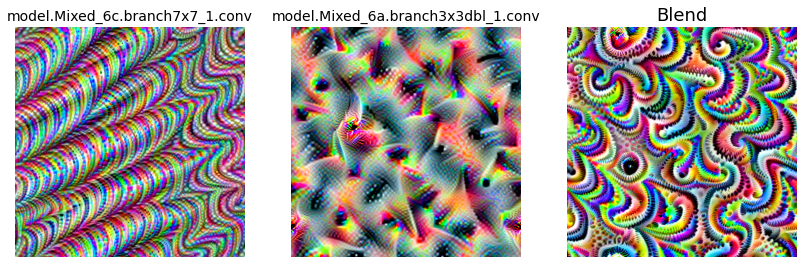

In [58]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (14,6))

ax.flat[0].imshow(out_layer_1)
ax.flat[0].set_title("model.Mixed_6c.branch7x7_1.conv", fontsize = 14)
ax.flat[0].axis("off")

ax.flat[1].imshow(out_layer_2)
ax.flat[1].axis("off")
ax.flat[1].set_title("model.Mixed_6a.branch3x3dbl_1.conv", fontsize = 14)

ax.flat[2].imshow(out_layer_blend)
ax.flat[2].axis("off")
ax.flat[2].set_title("Blend", fontsize = 18)


## Visualizing 2 channels individually first, and then simultaneously

In [ ]:
layers_to_use = [model.Mixed_6c.branch7x7_1.conv]

In [4]:
def optimize_6th_channel(layer_outputs):
    loss = layer_outputs[0][6].norm()   ## 6th channel
    return loss

out_single_channel_1 = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 8,
    iterations = 200,
    lr = 5.9,
    custom_func =  optimize_6th_channel,
    max_rotation =  0.3
)

def optimize_7th_channel(layer_outputs):
    loss = layer_outputs[0][7].norm()   ## 6th channel
    return loss

out_single_channel_2 = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 8,
    iterations = 200,
    lr = 5.9,
    custom_func =  optimize_7th_channel,
    max_rotation =  0.3
)

100%|██████████| 9/9 [00:48<00:00,  5.40s/it]


Text(0.5, 1.0, 'model.Mixed_6a.branch3x3dbl_1.conv_channel_7')

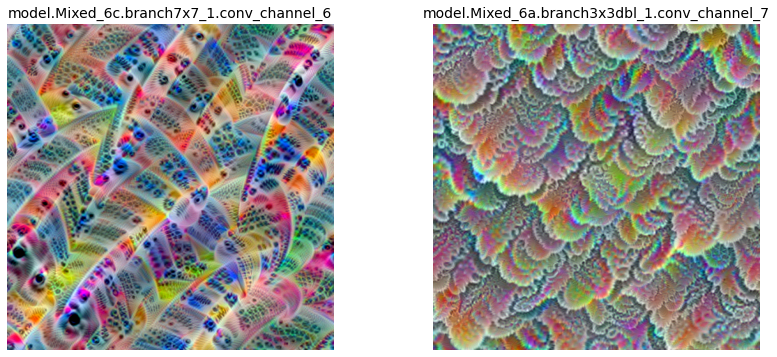

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax.flat[0].imshow(out_single_channel_1)
ax.flat[0].set_title("model.Mixed_6c.branch7x7_1.conv_channel_6", fontsize = 14)
ax.flat[0].axis("off")

ax.flat[1].imshow(out_single_channel_2)
ax.flat[1].axis("off")
ax.flat[1].set_title("model.Mixed_6a.branch3x3dbl_1.conv_channel_7", fontsize = 14)


## Visualizing 2 channels simultaneously


Notice how we've altered the `custom_func` to include both the channels with `loss = layer_outputs[0][7].norm()  + layer_outputs[0][6].norm() ` i.e adding the activations of the 7th and 6th channel


In [6]:
def optimize_both_channels(layer_outputs):
    loss = layer_outputs[0][7].norm()   + layer_outputs[0][6].norm() 
    return loss

out_blend_channels = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use,
    octave_scale = 1.2,
    num_octaves = 8,
    iterations = 200,
    lr = 5.9,
    custom_func =  optimize_both_channels,
    max_rotation =  0.3
)

100%|██████████| 9/9 [00:48<00:00,  5.39s/it]


Text(0.5, 1.0, 'blend both channels')

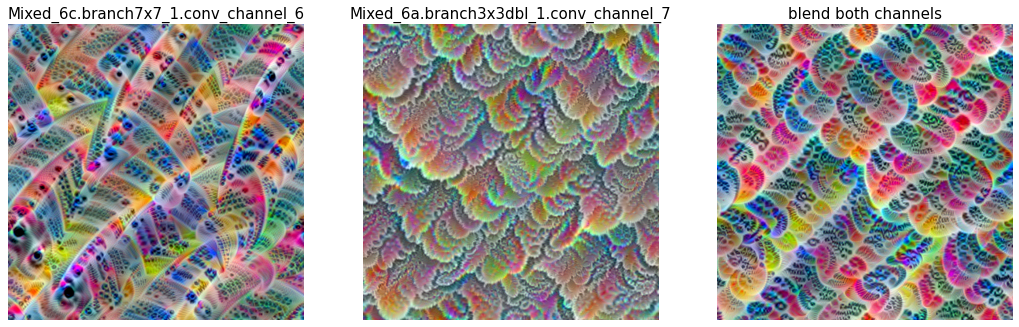

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize = (18,10))

ax.flat[0].imshow(out_single_channel_1)
ax.flat[0].set_title("Mixed_6c.branch7x7_1.conv_channel_6", fontsize = 15)
ax.flat[0].axis("off")

ax.flat[1].imshow(out_single_channel_2)
ax.flat[1].axis("off")
ax.flat[1].set_title("Mixed_6a.branch3x3dbl_1.conv_channel_7", fontsize = 15)

ax.flat[2].imshow(out_blend_channels)
ax.flat[2].axis("off")
ax.flat[2].set_title("blend both channels", fontsize = 15)


## Optimizing one single unit within a channel

In [14]:

def optimize_1_unit(layer_outputs):
    """
    You can alter this function to use as many layers as you want
    Just make sure you also include them in the layers argument
    """
    loss = layer_outputs[0][100][0][0].norm()

    return loss

out_unit_1 = dreamy_boi.deep_dream(
    image_path = "noise.jpg",
    layers = layers_to_use[:1],  ## using only model.Mixed_6c.branch7x7_1.conv
    octave_scale = 1.1,
    num_octaves = 16,
    iterations = 250,
    lr = 8.9,
    custom_func = optimize_1_unit
)

100%|██████████| 17/17 [01:56<00:00,  6.87s/it]


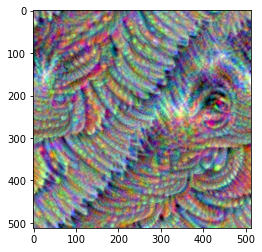

In [16]:
plt.imshow(out_unit_1)
plt.show()